In [27]:
from __future__ import print_function
__author__= 'kk3374'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
myMean = 600

# Central Limit Theorem
A definition of Central Limit Theorem as stated in FB email, '3 Clarifications from today's class':
"The distribution of a sample drawn from a parent distribution will look increasingly more like the parent 
distribution as the size of the sample increases. The distribution of the means of N samples generated from the 
parent distribution will be normally distributed (Gaussian), have a mean equal to the parent distribution and
its standard deviation will be equal to the parent population standard deviation divided by the square root of
the sammple size. 

[597.22359983572881, 599.61610494472086, 600.50903235771125, 599.33380674955868, 600.51257896448647, 600.02410895523087, 599.80099750537897, 599.79211519190801, 600.2639080798092, 599.9529106151366, 600.14645674855444, 599.93249068057855, 600.74370747939679, 600.2047746822966, 600.26161473188029, 599.41367330752678, 599.97340097104257, 599.58114636640335, 600.35281263457807, 599.75046186960071, 600.18540512691698, 600.43845753223241, 600.27776350737292, 600.01290817364315, 600.61484112821222, 600.21342283008619, 600.16708709122224, 599.79596123129625, 599.79739882126557, 600.00943225550145, 599.94774450376735, 599.77047557863125, 600.06744005463509, 600.05714777809771, 599.9527947373349, 600.04551234868916, 600.02318773566594, 599.79818237309121, 600.22843736583968, 599.8026377721651, 600.28124510490738, 599.97620304942143, 599.69425063332812, 600.14967336126574, 600.11499681821249, 599.97499597546391, 600.18077118301437, 599.89986642225949, 600.03214446775814, 599.98341733392044, 599.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


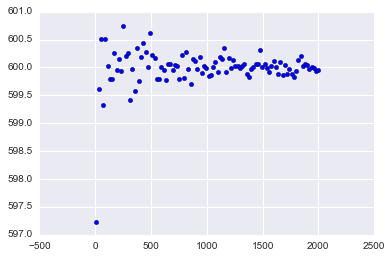

In [29]:
#Normal Distribution
#np.random.seed(300)
loc = myMean
#create a function which returns the mean of each randomly generated chi-squared distribution
def create_norm_size(loc, s):
    return np.random.normal(loc, scale = 5, size = s).mean()

listOfNormal = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a normal distribution
    listOfNormal.append(create_norm_size(loc, n))
print(listOfNormal)

indexOfValues = np.linspace(10, 2000, 100)

pl.figure()
pl.scatter(indexOfValues, listOfNormal)

The plot above depicts one aspect of the CLT, which is that as the sample of means increases,
the mean of those samples approaches the mean of the population. In this case, as the number
of samples increases, the mean approaches 600. 

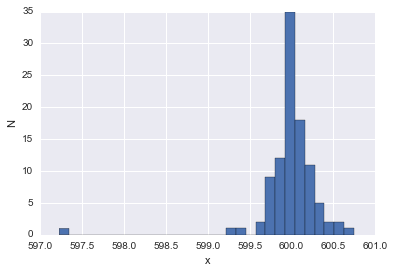

In [44]:
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(listOfNormal, bins = 30)
pl.ylabel('N')
pl.xlabel('x')

[600.17709040896318, 599.95324520784277, 600.10586242338115, 599.91253607324177, 600.04576149567026, 599.97446633953132, 599.918360380737, 599.99276803428563, 600.05363751460129, 599.91229674691499, 600.02127342469464, 600.01814610232225, 600.11688879006738, 599.95764490554291, 599.97620145233122, 599.95109033746598, 600.03976348178719, 599.96722487262628, 599.98783538869782, 599.97387538209796, 599.95521512993241, 599.98473986211809, 600.03584242528416, 599.9769446569743, 600.0600181888509, 600.00244584140523, 599.95483906384118, 600.01004936559252, 600.06723715524799, 600.02809981674, 600.02693866566869, 599.98065002960334, 599.95701212157121, 600.03417600975979, 599.97627975599767, 600.08135301043808, 599.97683421204488, 599.95530506494163, 600.06283953620914, 600.01176067433562, 600.00256468685666, 599.98069480563447, 599.96537216075035, 600.03570266583722, 600.00392090141702, 599.95840104756667, 600.0235811987726, 600.01104622342496, 600.00902769987078, 600.0261953265117, 600.0045

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


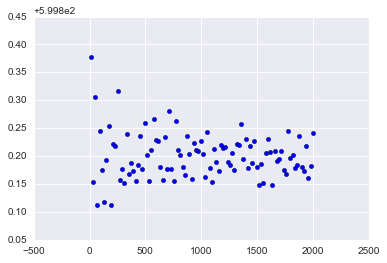

In [52]:
#Poisson Distribution
lam = myMean
#create a function which returns the mean of each randomly generated chi-squared distribution
def create_poisson_size(lam, s):
    return np.random.normal(lam, size = s).mean()

listOfPoisson = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a normal distribution
    listOfPoisson.append(create_poisson_size(lam, n))
print(listOfPoisson)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure()
pl.scatter(indexOfValues, listOfPoisson)

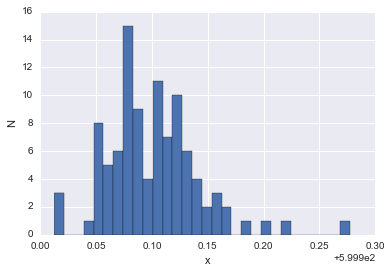

In [53]:
pl.hist(listOfPoisson, bins = 30)
pl.ylabel('N')
pl.xlabel('x')

[599.38999999999999, 601.55999999999995, 600.48000000000002, 602.09000000000003, 598.84000000000003, 598.19000000000005, 600.08000000000004, 600.04999999999995, 601.26999999999998, 599.08000000000004, 600.17999999999995, 601.28999999999996, 598.24000000000001, 600.38, 600.37, 598.83000000000004, 600.49000000000001, 600.32000000000005, 595.32000000000005, 600.69000000000005, 601.55999999999995, 599.02999999999997, 599.71000000000004, 602.76999999999998, 601.33000000000004, 599.88, 596.46000000000004, 597.48000000000002, 599.48000000000002, 597.61000000000001, 600.85000000000002, 600.76999999999998, 601.32000000000005, 599.39999999999998, 600.21000000000004, 598.57000000000005, 598.59000000000003, 598.42999999999995, 598.19000000000005, 600.05999999999995, 598.37, 600.98000000000002, 599.39999999999998, 597.44000000000005, 599.85000000000002, 599.12, 599.19000000000005, 600.89999999999998, 601.75, 600.62, 598.59000000000003, 601.78999999999996, 598.02999999999997, 597.37, 596.05999999999

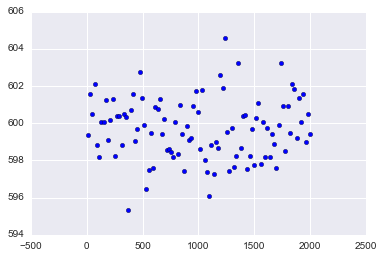

In [56]:
#Binomial Distribution
#double check this equation, because 's' shouldn't need to be defined prior to calling it
n = 1200
p = .5
s = 100
def create_binomial_size(n, p, s):
    return np.random.binomial(n, p, size = s).mean()

listOfBinomial = []
for i in np.linspace(10, 2000, 100):
    #draws samples from a chi-squared distribution
    listOfBinomial.append(create_binomial_size(n, p, s))
print(listOfBinomial)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure()
pl.scatter(indexOfValues, listOfBinomial)

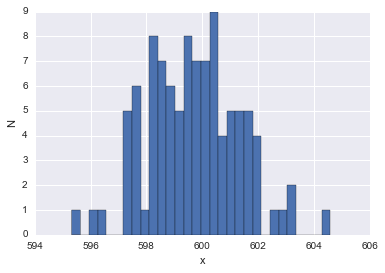

In [57]:
pl.hist(listOfBinomial, bins = 30)
pl.ylabel('N')
pl.xlabel('x')

[609.02627152817649, 607.80419967117825, 598.69784623444059, 605.72245569898087, 597.30116610535129, 599.57645838146118, 596.76276450521459, 605.30097862411321, 603.75964236886909, 602.21932529958326, 597.5646197018192, 599.1241359580273, 599.50423166127996, 596.77896167623624, 597.72160086093345, 602.09503051907507, 600.98145417169724, 601.07471982979496, 602.44942893529151, 600.09614502250679, 598.65550251016327, 599.97976863628151, 598.30910055207119, 599.46555654010353, 601.12432965377513, 598.6006538603657, 602.00752978993899, 604.79747280120466, 601.41492681018383, 601.67770544631264, 600.16467973380588, 602.16921503255696, 599.75387850850188, 598.09710255199275, 597.42506281116391, 601.30293976032874, 600.45582819202627, 601.24530746722803, 599.45655696832375, 601.57100172204161, 600.11728454062597, 602.16653840855486, 599.64402859674738, 600.35593201767801, 601.787808325887, 598.70883745434526, 598.18874763120982, 599.4691894927779, 599.45000444643904, 600.65967457557258, 601.4

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


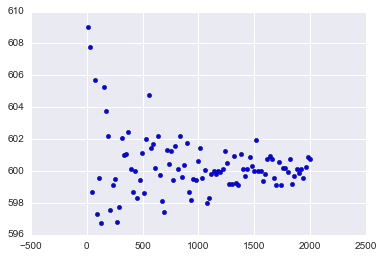

In [36]:
#Chi-Squared Distribution
df = myMean
#create a function which returns the mean of each randomly generated chi-squared distribution
def create_chisq_size(df, s):
    return np.random.chisquare(df, size = s).mean()

listOfChi = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a chi-squared distribution
    listOfChi.append(create_chisq_size(df, n))
print(listOfChi)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure()
pl.scatter(indexOfValues, listOfChi)

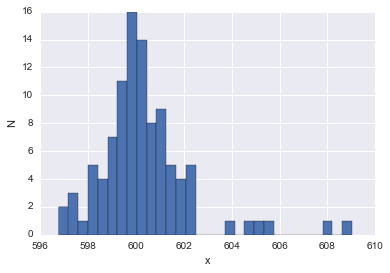

In [37]:
pl.hist(listOfChi, bins = 30)
pl.ylabel('N')
pl.xlabel('x')

[646.46464369671014, 609.58602540801428, 716.75027668233417, 530.02785281033937, 637.16917500658985, 615.819102741508, 529.65930899319824, 530.05644059219185, 574.08572439646468, 589.73422387901758, 578.94927932280189, 589.08505578722918, 553.24845830753361, 566.88359600412139, 668.54138576365165, 574.36977328549381, 600.08707878318387, 606.61625610146405, 616.9265110409699, 637.48372926844775, 634.13948437145154, 650.02694995171214, 599.19272591318418, 579.73978367526411, 554.20028406755478, 596.54380939491284, 574.67011243100751, 578.15622846329779, 584.51222103428586, 606.98793903284081, 624.03563270221184, 611.93828196327843, 590.17605952820463, 577.82365187914263, 601.50668642666744, 601.37599332953778, 606.59149340132967, 579.47744857856071, 635.40715391634501, 581.64795817857873, 573.73978521172251, 600.96422872772382, 616.86460564606728, 583.45055412043178, 589.7033137593113, 621.15912998999704, 604.71783216443043, 562.34480864037755, 601.4133761993811, 609.8262659972703, 578.0

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


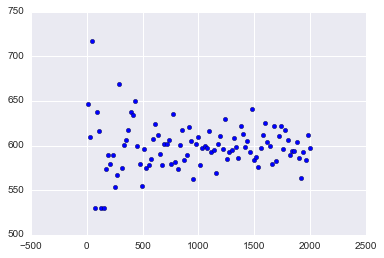

In [46]:
#Exponential Distribution
scale = myMean
#create a function which returns the mean of each randomly generated chi-squared distribution
def create_exponential_size(scale, s):
    return np.random.exponential(scale, size = s).mean()

listOfExponential = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a chi-squared distribution
    listOfExponential.append(create_exponential_size(scale, n))
print(listOfExponential)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure()
pl.scatter(indexOfValues, listOfExponential)

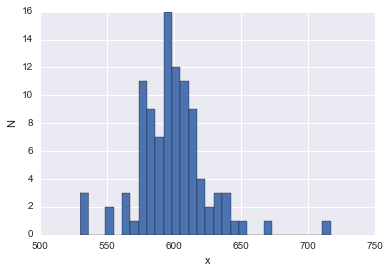

In [47]:
pl.hist(listOfExponential, bins = 30)
pl.ylabel('N')
pl.xlabel('x')